In [2]:
!pip install shap

In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import shap
import matplotlib.pyplot as plt

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
file_path = 'all_sentiment_analysis.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the Preprocessed_Text column
stop_words = set(stopwords.words('english'))

# Ensure all values in Preprocessed_Text are strings
data['Preprocessed_Text'] = data['Preprocessed_Text'].fillna("").astype(str)

# Process the texts
texts_processed = [
    [word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words]
    for doc in data['Preprocessed_Text']
]

# Initialize VADER for Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Function to get sentiment prediction
def vader_sentiment_prediction(texts):
    return np.array([sia.polarity_scores(text)['compound'] for text in texts])

# Sentiment SHAP Analysis
sample_texts_sentiment = data['Text'].dropna().sample(20, random_state=42).astype(str)
explainer_sentiment = shap.Explainer(vader_sentiment_prediction, sample_texts_sentiment)
shap_values_sentiment = explainer_sentiment(sample_texts_sentiment)

# Plot SHAP values for Sentiment Analysis
print("SHAP Sentiment Analysis Summary Plot")
shap.summary_plot(shap_values_sentiment, feature_names=sample_texts_sentiment)

# Topic Modeling with LDA
dictionary = Dictionary(texts_processed)
corpus = [dictionary.doc2bow(text) for text in texts_processed]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Function to get topic predictions
def lda_topic_prediction(texts):
    bow = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in texts]
    topic_distributions = [lda_model.get_document_topics(doc) for doc in bow]
    return np.array([[dist[1] for dist in doc] for doc in topic_distributions])

# Topic SHAP Analysis
sample_texts_topic = data['Preprocessed_Text'].sample(20, random_state=42).astype(str)
explainer_topic = shap.Explainer(lda_topic_prediction, sample_texts_topic)
shap_values_topic = explainer_topic(sample_texts_topic)

# Plot SHAP values for Topic Modeling
print("SHAP Topic Modeling Summary Plot")
shap.summary_plot(shap_values_topic, feature_names=sample_texts_topic)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ahmedatout/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmedatout/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedatout/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IndexError: tuple index out of range

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ahmedatout/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_force_matplotlib.py:321: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_x, max_x)



Text 1: Instantly she wanted to walk out of the store but she held her composure and ordered what she wanted.


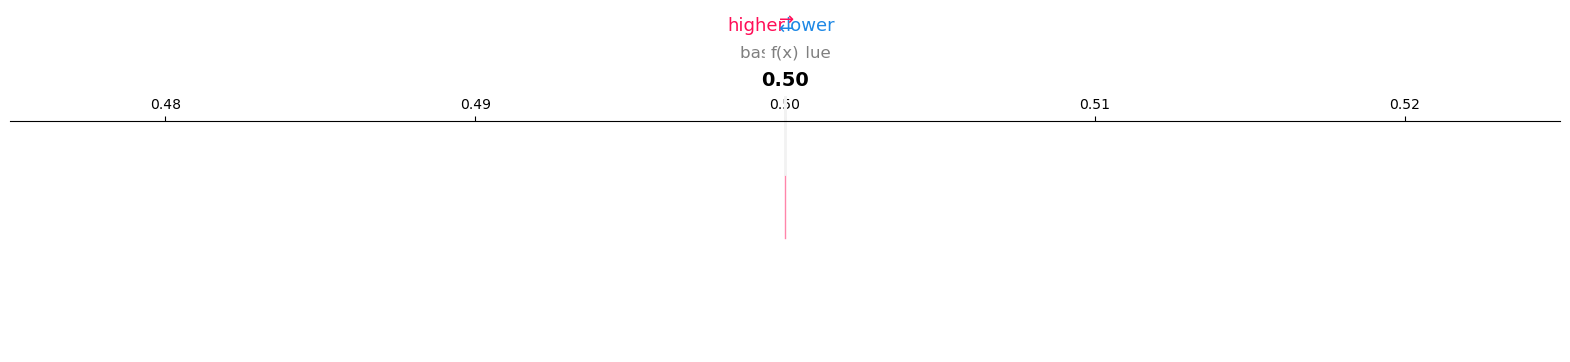


Text 2: On like Monday.


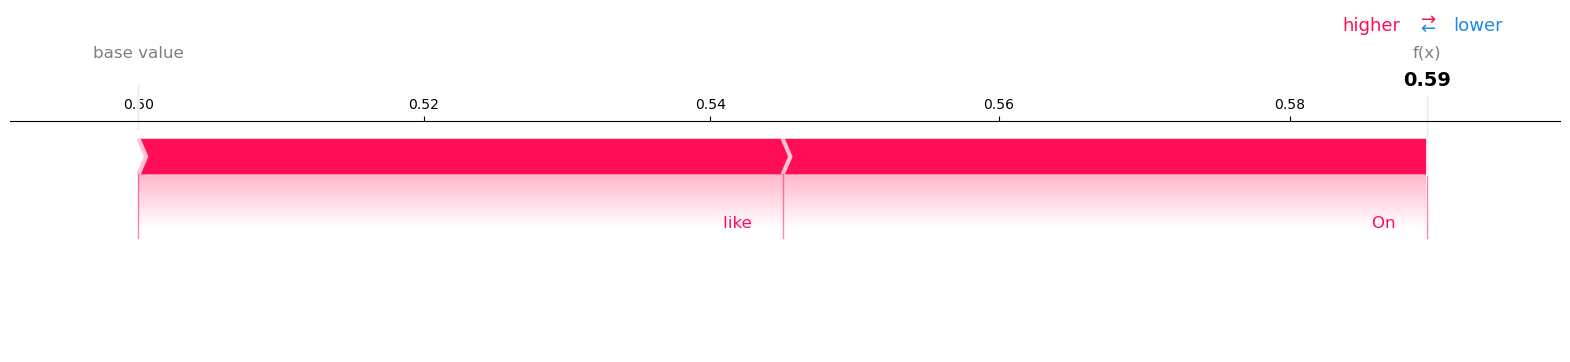


Text 3: and I think the most important thing is I really connected really well with her .


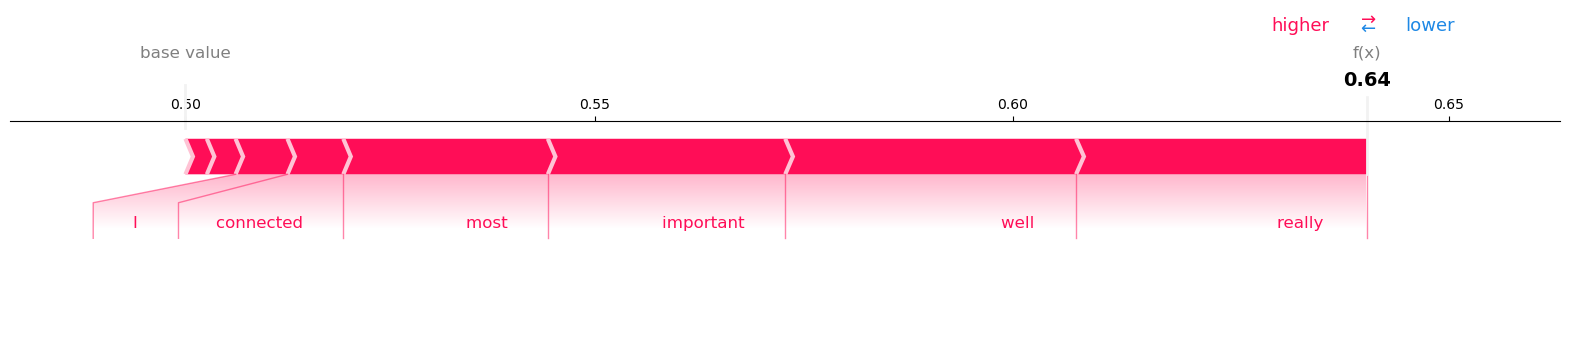


Text 4: about it &-um .


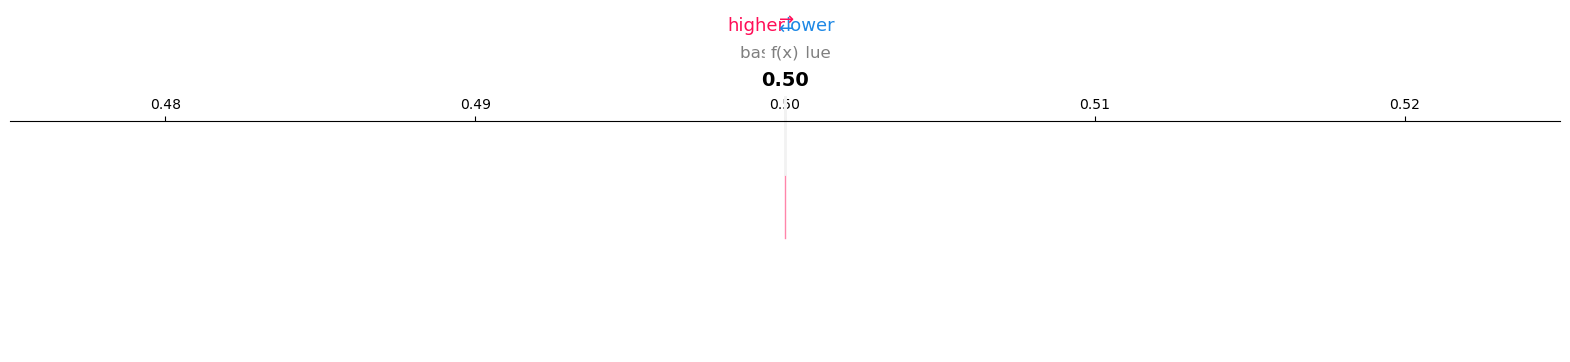


Text 5: and that I think was &~like the biggest thing (be)cause my whole life I thought it wasn't okay just because it was something not everyone does .


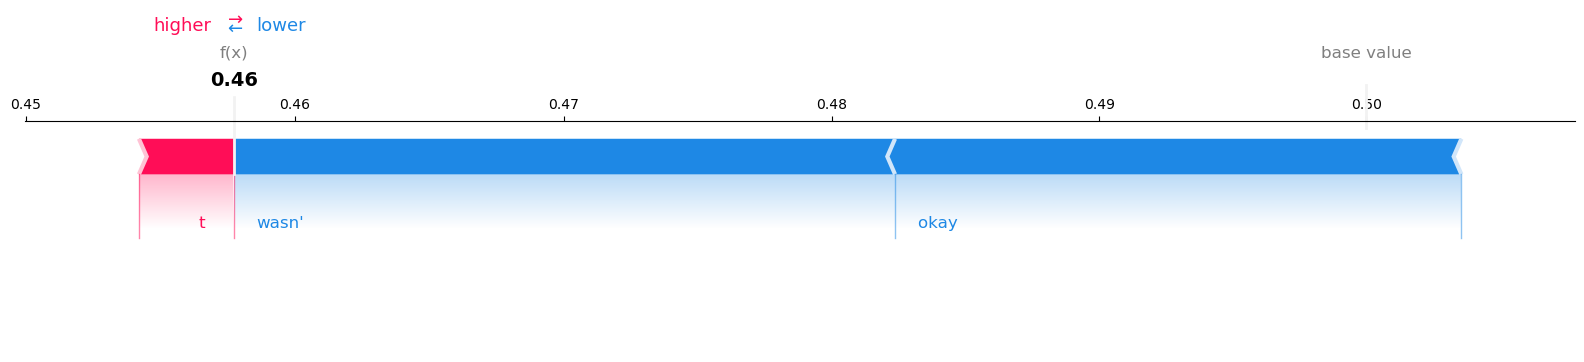


Text 6: but no body is +//.


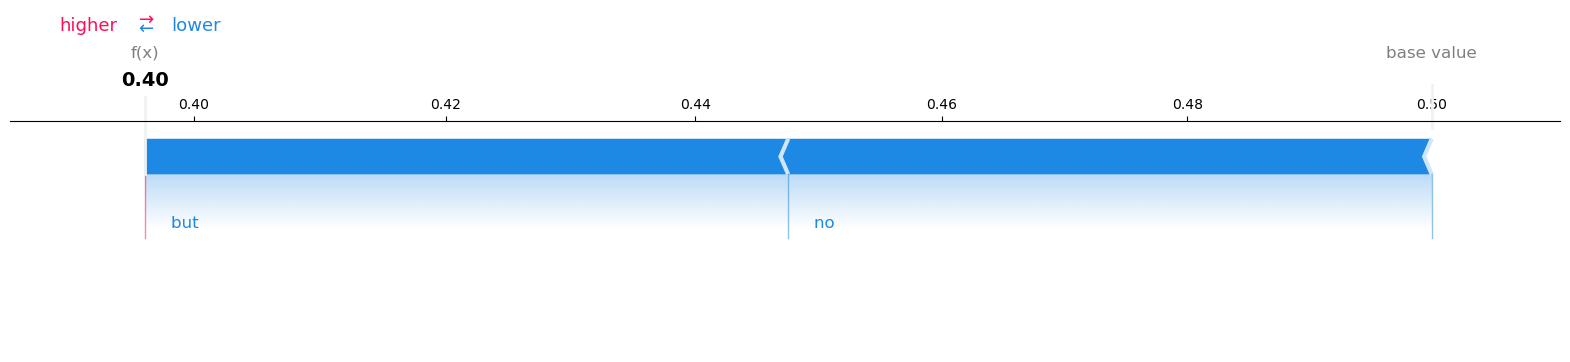


Text 7: &-um well that's a difficult question .


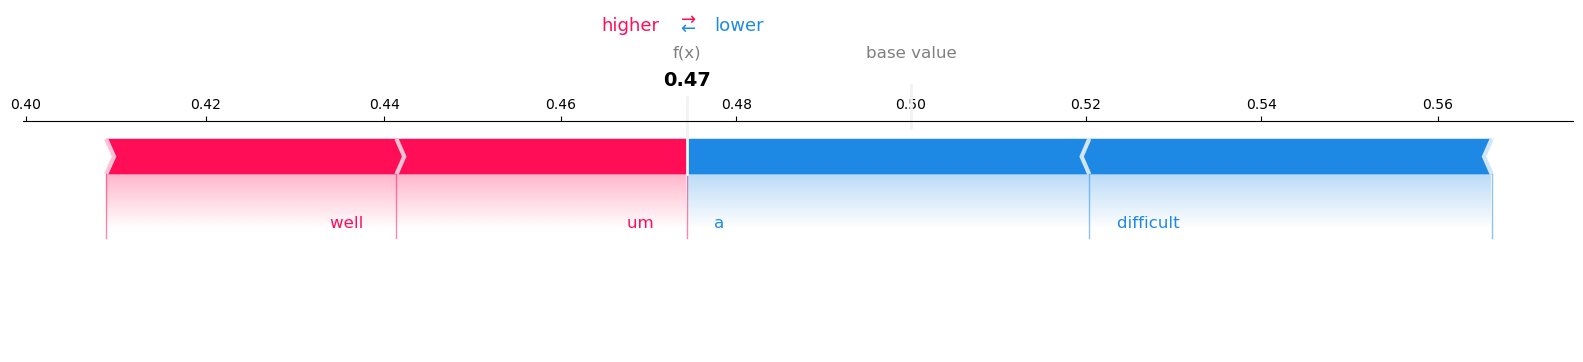


Text 8: And like I still go.


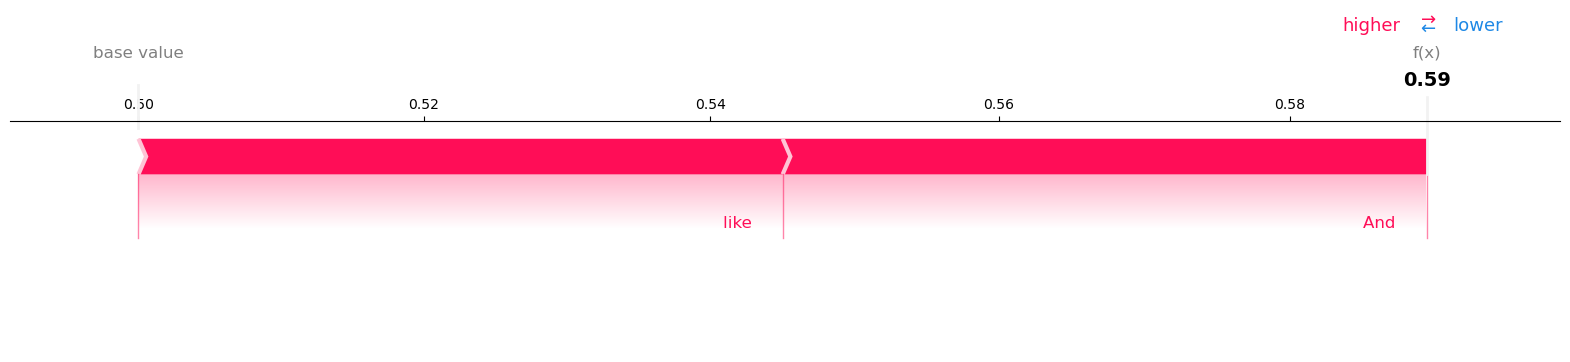


Text 9: I would say &-uh for me now successful communication means getting my point across to the other person I'm communicating with, even during challenging discussions at work.


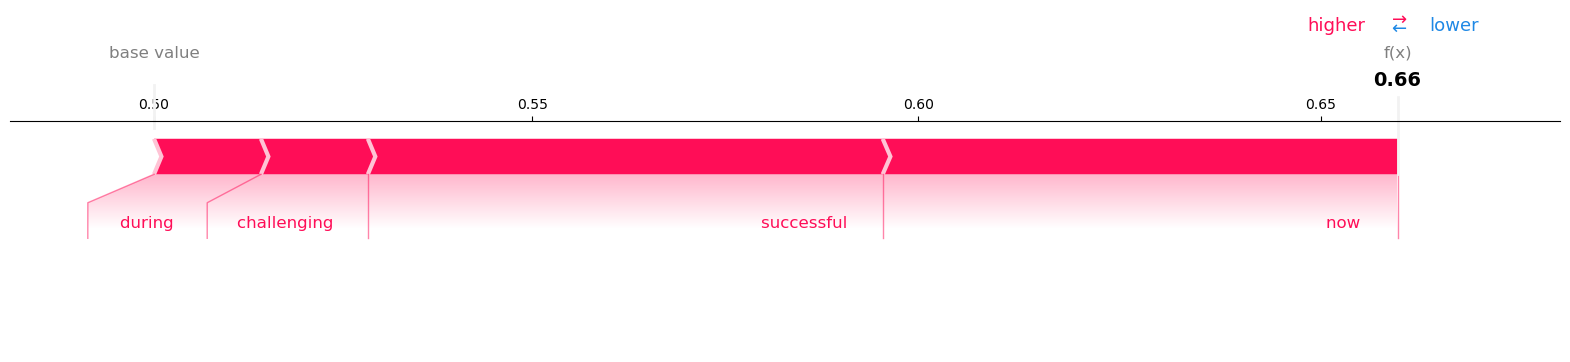


Text 10: Oh and with strangers I stutter more.


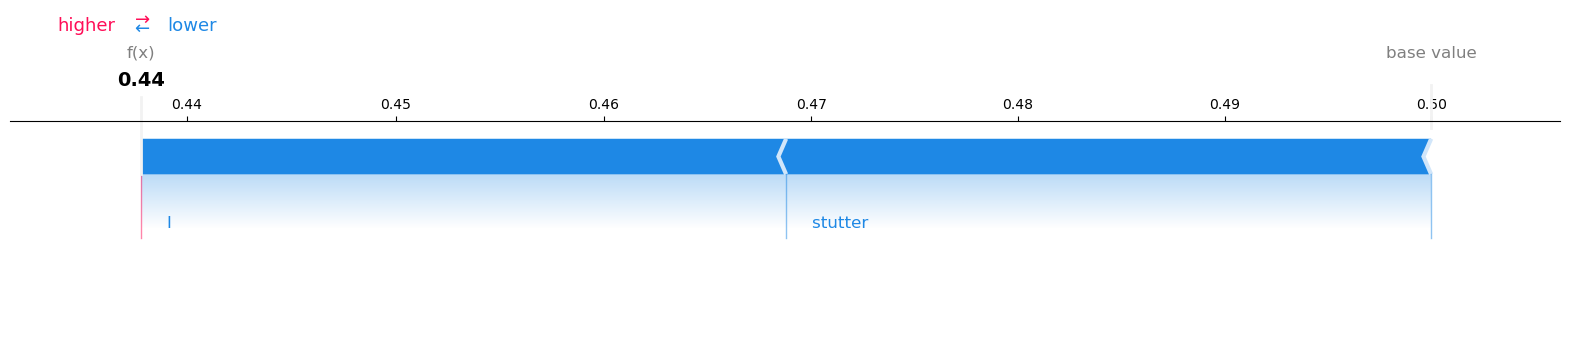

In [11]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import shap
import matplotlib.pyplot as plt

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')

# Load dataset
file_path = 'all_sentiment_analysis.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop rows with missing or invalid text
data = data.dropna(subset=['Text'])
data['Text'] = data['Text'].astype(str)

# Initialize VADER for Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Function to predict sentiment scores
def vader_sentiment_prediction(texts):
    return [sia.polarity_scores(text)['compound'] for text in texts]

# Use SHAP's Text Masker
text_masker = shap.maskers.Text(mask_token="[MASK]")

# Initialize SHAP Explainer with Text Masker
explainer_sentiment = shap.Explainer(vader_sentiment_prediction, text_masker)

# Select a larger sample of texts
sample_texts = data['Text'].sample(10, random_state=42).tolist()  # Adjust number of samples here

# Generate SHAP values
shap_values_sentiment = explainer_sentiment(sample_texts)

# Visualize SHAP force plot for each text
for i, text in enumerate(sample_texts):
    print(f"\nText {i+1}: {text}")
    shap.force_plot(
        shap_values_sentiment[i].base_values,
        shap_values_sentiment[i].values,
        shap_values_sentiment[i].data,
        link="logit",
        matplotlib=True
    )
    plt.show()  # Ensure plots render properly for each text